In [42]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, linear_model
from sklearn import model_selection
from sklearn.metrics import accuracy_score # accuracy      #mes  --> linerregression    accuracy_score --> classification, LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
import seaborn as sns
import random as rnd
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [43]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [44]:
df = pd.read_csv('nba.games.stats_raw.csv')
df.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,29/10/2014,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,01/11/2014,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,05/11/2014,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,07/11/2014,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,08/11/2014,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
Unnamed: 0                  9840 non-null int64
Team                        9840 non-null object
Game                        9840 non-null int64
Date                        9840 non-null object
Home                        9840 non-null object
Opponent                    9840 non-null object
WINorLOSS                   9840 non-null object
TeamPoints                  9840 non-null int64
OpponentPoints              9840 non-null int64
FieldGoals                  9840 non-null int64
FieldGoalsAttempted         9840 non-null int64
FieldGoals.                 9840 non-null float64
X3PointShots                9840 non-null int64
X3PointShotsAttempted       9840 non-null int64
X3PointShots.               9840 non-null float64
FreeThrows                  9840 non-null int64
FreeThrowsAttempted         9840 non-null int64
FreeThrows.                 9840 non-null float64
OffRebounds       

In [46]:
data = pd.DataFrame(df)

In [47]:
data['new_dates'] = pd.to_datetime(data['Date'])
start_date = '10/01/2017'
end_date = '04/30/2018'

mask = (data['new_dates'] > start_date) & (data['new_dates'] <= end_date)
data = data.loc[mask]

data

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,new_dates
4973,5460,ATL,54,10/02/2017,Away,SAC,L,107,108,36,...,21,0.667,8,39,27,12,2,18,27,2017-10-02
4984,6560,ATL,65,10/03/2017,Home,TOR,W,105,99,39,...,27,0.778,16,46,19,17,5,11,28,2017-10-03
4985,6660,ATL,66,11/03/2017,Away,MEM,W,107,90,36,...,23,0.739,13,41,22,11,3,13,21,2017-11-03
5000,8161,ATL,81,11/04/2017,Home,CHO,W,103,76,41,...,19,0.789,15,40,16,11,1,13,17,2017-11-04
5001,8260,ATL,82,12/04/2017,Away,IND,L,86,104,30,...,19,0.842,8,41,21,5,7,10,14,2017-12-04
5040,3961,BOS,39,11/01/2017,Home,WAS,W,117,108,43,...,12,0.667,16,44,28,10,3,7,13,2017-11-01
5055,5461,BOS,54,11/02/2017,Away,UTA,W,112,104,42,...,30,0.867,13,39,16,9,2,9,19,2017-11-02
5067,6661,BOS,66,10/03/2017,Away,DEN,L,99,119,34,...,22,0.773,11,50,24,11,4,18,18,2017-10-03
5068,6761,BOS,67,12/03/2017,Home,CHI,W,100,80,40,...,9,0.778,12,40,18,13,3,17,10,2017-12-03
5082,8162,BOS,81,10/04/2017,Home,BRK,W,114,105,41,...,39,0.897,9,49,18,8,6,12,19,2017-10-04


In [48]:
da = [data]

for dataset in da:
    dataset.loc[dataset['Home'] == 'Home', 'Home'] = 1
    dataset.loc[dataset['Home'] == 'Away', 'Home'] = 0
data['Home']


4973    0
4984    1
4985    0
5000    1
5001    0
5040    1
5055    0
5067    0
5068    1
5082    1
5083    1
5121    1
5137    1
5147    0
5148    1
5164    0
5165    0
5219    1
5230    1
5231    1
5246    0
5247    0
5287    0
5301    0
5302    0
5312    1
5313    0
5328    1
5329    1
5367    0
       ..
9795    1
9800    1
9801    1
9802    0
9803    0
9804    0
9805    0
9806    0
9807    1
9808    1
9809    0
9814    0
9815    0
9816    1
9817    1
9818    0
9819    1
9820    1
9821    1
9825    1
9826    0
9827    1
9828    0
9829    1
9830    1
9831    1
9832    0
9833    1
9834    0
9835    0
Name: Home, Length: 1920, dtype: int64

In [49]:
da = [data]

for dataset in da:
    dataset.loc[dataset['WINorLOSS'] == 'W', 'WINorLOSS'] = 1
    dataset.loc[dataset['WINorLOSS'] == 'L', 'WINorLOSS'] = 0
data['WINorLOSS']


4973    0
4984    1
4985    1
5000    1
5001    0
5040    1
5055    1
5067    0
5068    1
5082    1
5083    1
5121    0
5137    0
5147    0
5148    1
5164    0
5165    0
5219    0
5230    1
5231    0
5246    0
5247    0
5287    0
5301    0
5302    0
5312    0
5313    0
5328    1
5329    1
5367    0
       ..
9795    1
9800    1
9801    0
9802    0
9803    1
9804    0
9805    0
9806    1
9807    1
9808    1
9809    1
9814    1
9815    1
9816    0
9817    1
9818    1
9819    0
9820    0
9821    0
9825    0
9826    1
9827    1
9828    0
9829    0
9830    0
9831    1
9832    0
9833    1
9834    0
9835    0
Name: WINorLOSS, Length: 1920, dtype: int64

In [50]:
data.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,new_dates
4973,5460,ATL,54,10/02/2017,0,SAC,0,107,108,36,...,21,0.667,8,39,27,12,2,18,27,2017-10-02
4984,6560,ATL,65,10/03/2017,1,TOR,1,105,99,39,...,27,0.778,16,46,19,17,5,11,28,2017-10-03
4985,6660,ATL,66,11/03/2017,0,MEM,1,107,90,36,...,23,0.739,13,41,22,11,3,13,21,2017-11-03
5000,8161,ATL,81,11/04/2017,1,CHO,1,103,76,41,...,19,0.789,15,40,16,11,1,13,17,2017-11-04
5001,8260,ATL,82,12/04/2017,0,IND,0,86,104,30,...,19,0.842,8,41,21,5,7,10,14,2017-12-04


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 4973 to 9835
Data columns (total 42 columns):
Unnamed: 0                  1920 non-null int64
Team                        1920 non-null object
Game                        1920 non-null int64
Date                        1920 non-null object
Home                        1920 non-null int64
Opponent                    1920 non-null object
WINorLOSS                   1920 non-null int64
TeamPoints                  1920 non-null int64
OpponentPoints              1920 non-null int64
FieldGoals                  1920 non-null int64
FieldGoalsAttempted         1920 non-null int64
FieldGoals.                 1920 non-null float64
X3PointShots                1920 non-null int64
X3PointShotsAttempted       1920 non-null int64
X3PointShots.               1920 non-null float64
FreeThrows                  1920 non-null int64
FreeThrowsAttempted         1920 non-null int64
FreeThrows.                 1920 non-null float64
OffRebounds      

In [52]:
del data['new_dates']
del data['Unnamed: 0']
del data['Date']
del data['Game']
del data['TeamPoints']
del data['OpponentPoints']


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 4973 to 9835
Data columns (total 36 columns):
Team                        1920 non-null object
Home                        1920 non-null int64
Opponent                    1920 non-null object
WINorLOSS                   1920 non-null int64
FieldGoals                  1920 non-null int64
FieldGoalsAttempted         1920 non-null int64
FieldGoals.                 1920 non-null float64
X3PointShots                1920 non-null int64
X3PointShotsAttempted       1920 non-null int64
X3PointShots.               1920 non-null float64
FreeThrows                  1920 non-null int64
FreeThrowsAttempted         1920 non-null int64
FreeThrows.                 1920 non-null float64
OffRebounds                 1920 non-null int64
TotalRebounds               1920 non-null int64
Assists                     1920 non-null int64
Steals                      1920 non-null int64
Blocks                      1920 non-null int64
Turnovers         

In [54]:
x_data = data
y_data = x_data[['WINorLOSS']]

In [55]:
del data['WINorLOSS']

In [56]:
from sklearn import datasets, model_selection, linear_model

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 4973 to 9835
Data columns (total 35 columns):
Team                        1920 non-null object
Home                        1920 non-null int64
Opponent                    1920 non-null object
FieldGoals                  1920 non-null int64
FieldGoalsAttempted         1920 non-null int64
FieldGoals.                 1920 non-null float64
X3PointShots                1920 non-null int64
X3PointShotsAttempted       1920 non-null int64
X3PointShots.               1920 non-null float64
FreeThrows                  1920 non-null int64
FreeThrowsAttempted         1920 non-null int64
FreeThrows.                 1920 non-null float64
OffRebounds                 1920 non-null int64
TotalRebounds               1920 non-null int64
Assists                     1920 non-null int64
Steals                      1920 non-null int64
Blocks                      1920 non-null int64
Turnovers                   1920 non-null int64
TotalFouls        

In [58]:
data.describe()

,Home,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,1920.00000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.50000,39.523958,86.021354,0.460374,10.392708,28.810417,0.360241,16.770312,21.816146,0.770218,...,16.770312,21.816146,0.770218,9.844792,43.578125,23.147396,7.739583,4.791667,13.654687,19.796875
std,0.50013,5.087709,6.958753,0.054502,3.577905,6.751951,0.092502,5.982331,7.332002,0.103932,...,5.982331,7.332002,0.103932,3.682964,6.337243,5.143450,2.976177,2.510288,3.779767,4.219782
min,0.00000,22.000000,64.000000,0.282000,1.000000,11.000000,0.077000,1.000000,1.000000,0.143000,...,1.000000,1.000000,0.143000,1.000000,22.000000,7.000000,0.000000,0.000000,3.000000,9.000000
25%,0.00000,36.000000,81.000000,0.423000,8.000000,24.000000,0.296000,13.000000,17.000000,0.704000,...,13.000000,17.000000,0.704000,7.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,0.50000,39.000000,86.000000,0.459000,10.000000,29.000000,0.360000,16.000000,21.000000,0.778000,...,16.000000,21.000000,0.778000,10.000000,43.000000,23.000000,8.000000,5.000000,14.000000,20.000000
75%,1.00000,43.000000,91.000000,0.494000,13.000000,33.000000,0.423000,21.000000,26.000000,0.842000,...,21.000000,26.000000,0.842000,12.000000,48.000000,27.000000,10.000000,6.000000,16.000000,23.000000
max,1.00000,58.000000,113.000000,0.667000,24.000000,57.000000,0.714000,41.000000,64.000000,1.000000,...,41.000000,64.000000,1.000000,23.000000,68.000000,40.000000,17.000000,16.000000,29.000000,42.000000


In [59]:
df_team = data['Team']

df_team2 = df_team.drop_duplicates(keep='first')

df_team2

4973    ATL
5040    BOS
5121    BRK
5219    CHO
5287    CHI
5367    CLE
5450    DAL
5531    DEN
5616    DET
5697    GSW
5780    HOU
5860    IND
5944    LAC
6028    LAL
6108    MEM
6203    MIA
6283    MIL
6352    MIN
6435    NOP
6516    NYK
6599    OKC
6681    ORL
6759    PHI
6844    PHO
6928    POR
7023    SAC
7090    SAS
7188    TOR
7270    UTA
7335    WAS
Name: Team, dtype: object

In [60]:
da = [data]
team_titles = {"ATL": 1, "BOS": 2, "BRK": 3, "CHO": 4, "CHI": 5, 
               "CLE": 6, "DAL": 7, "DEN": 8, "DET": 9, "GSW": 10,
              "HOU": 11, "IND": 12, "LAC": 13, "LAL": 14, "MEM": 15,
              "MIA": 16, "MIL": 17, "MIN": 18, "NOP": 19, "NYK" :20,
              "OKC": 21, "ORL": 22, "PHI": 23, "PHO": 24, "POR": 25,
              "SAC": 26, "SAS": 27, "TOR":  28, "UTA": 29, "WAS": 30}

for dataset in da:
    dataset['Team'] = dataset['Team'].map(team_titles)
    dataset['Opponent'] = dataset['Opponent'].map(team_titles)

In [61]:
data_tf = data[['Team', 'FreeThrowsAttempted']]

In [62]:
data_tf

,Team,FreeThrowsAttempted
4973,1,31
4984,1,29
4985,1,26
5000,1,18
5001,1,19
5040,2,18
5055,2,23
5067,2,23
5068,2,4
5082,2,21


In [63]:
data.describe()

,Team,Home,Opponent,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,1920.00000,1920.00000,1920.00000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,15.45000,0.50000,15.45000,39.523958,86.021354,0.460374,10.392708,28.810417,0.360241,16.770312,...,16.770312,21.816146,0.770218,9.844792,43.578125,23.147396,7.739583,4.791667,13.654687,19.796875
std,8.65135,0.50013,8.65135,5.087709,6.958753,0.054502,3.577905,6.751951,0.092502,5.982331,...,5.982331,7.332002,0.103932,3.682964,6.337243,5.143450,2.976177,2.510288,3.779767,4.219782
min,1.00000,0.00000,1.00000,22.000000,64.000000,0.282000,1.000000,11.000000,0.077000,1.000000,...,1.000000,1.000000,0.143000,1.000000,22.000000,7.000000,0.000000,0.000000,3.000000,9.000000
25%,8.00000,0.00000,8.00000,36.000000,81.000000,0.423000,8.000000,24.000000,0.296000,13.000000,...,13.000000,17.000000,0.704000,7.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,15.00000,0.50000,15.00000,39.000000,86.000000,0.459000,10.000000,29.000000,0.360000,16.000000,...,16.000000,21.000000,0.778000,10.000000,43.000000,23.000000,8.000000,5.000000,14.000000,20.000000
75%,23.00000,1.00000,23.00000,43.000000,91.000000,0.494000,13.000000,33.000000,0.423000,21.000000,...,21.000000,26.000000,0.842000,12.000000,48.000000,27.000000,10.000000,6.000000,16.000000,23.000000
max,30.00000,1.00000,30.00000,58.000000,113.000000,0.667000,24.000000,57.000000,0.714000,41.000000,...,41.000000,64.000000,1.000000,23.000000,68.000000,40.000000,17.000000,16.000000,29.000000,42.000000


In [64]:
 target_col=['FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.' 
                 , 'X3PointShots','X3PointShotsAttempted', 'X3PointShots.' ,'FreeThrows', 
                 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
                 'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls',
                'Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.' ,'Opp.3PointShots',
                 'Opp.3PointShotsAttempted', 'Opp.3PointShots.' ,'Opp.FreeThrows', 
                 'Opp.FreeThrowsAttempted',
                'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals', 'Opp.Blocks',
                'Opp.Turnovers', 'Opp.TotalFouls']
weight_col = data[target_col].max()
weight_col

FieldGoals                   58.000
FieldGoalsAttempted         113.000
FieldGoals.                   0.667
X3PointShots                 24.000
X3PointShotsAttempted        57.000
X3PointShots.                 0.714
FreeThrows                   41.000
FreeThrowsAttempted          64.000
FreeThrows.                   1.000
OffRebounds                  23.000
TotalRebounds                68.000
Assists                      40.000
Steals                       17.000
Blocks                       16.000
Turnovers                    29.000
TotalFouls                   42.000
Opp.FieldGoals               58.000
Opp.FieldGoalsAttempted     113.000
Opp.FieldGoals.               0.667
Opp.3PointShots              24.000
Opp.3PointShotsAttempted     57.000
Opp.3PointShots.              0.714
Opp.FreeThrows               41.000
Opp.FreeThrowsAttempted      64.000
Opp.OffRebounds              23.000
Opp.TotalRebounds            68.000
Opp.Assists                  40.000
Opp.Steals                  

In [65]:
data_norm = data[target_col]/weight_col

In [66]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 4973 to 9835
Data columns (total 31 columns):
FieldGoals                  1920 non-null float64
FieldGoalsAttempted         1920 non-null float64
FieldGoals.                 1920 non-null float64
X3PointShots                1920 non-null float64
X3PointShotsAttempted       1920 non-null float64
X3PointShots.               1920 non-null float64
FreeThrows                  1920 non-null float64
FreeThrowsAttempted         1920 non-null float64
FreeThrows.                 1920 non-null float64
OffRebounds                 1920 non-null float64
TotalRebounds               1920 non-null float64
Assists                     1920 non-null float64
Steals                      1920 non-null float64
Blocks                      1920 non-null float64
Turnovers                   1920 non-null float64
TotalFouls                  1920 non-null float64
Opp.FieldGoals              1920 non-null float64
Opp.FieldGoalsAttempted     1920 non-nul

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 4973 to 9835
Data columns (total 35 columns):
Team                        1920 non-null int64
Home                        1920 non-null int64
Opponent                    1920 non-null int64
FieldGoals                  1920 non-null int64
FieldGoalsAttempted         1920 non-null int64
FieldGoals.                 1920 non-null float64
X3PointShots                1920 non-null int64
X3PointShotsAttempted       1920 non-null int64
X3PointShots.               1920 non-null float64
FreeThrows                  1920 non-null int64
FreeThrowsAttempted         1920 non-null int64
FreeThrows.                 1920 non-null float64
OffRebounds                 1920 non-null int64
TotalRebounds               1920 non-null int64
Assists                     1920 non-null int64
Steals                      1920 non-null int64
Blocks                      1920 non-null int64
Turnovers                   1920 non-null int64
TotalFouls          

In [68]:
data_re = data[['Team', 'Home', 'Opponent']]

In [69]:
data_ree = pd.concat([data_re, data_norm], axis=1)

In [70]:
data_ree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 4973 to 9835
Data columns (total 34 columns):
Team                        1920 non-null int64
Home                        1920 non-null int64
Opponent                    1920 non-null int64
FieldGoals                  1920 non-null float64
FieldGoalsAttempted         1920 non-null float64
FieldGoals.                 1920 non-null float64
X3PointShots                1920 non-null float64
X3PointShotsAttempted       1920 non-null float64
X3PointShots.               1920 non-null float64
FreeThrows                  1920 non-null float64
FreeThrowsAttempted         1920 non-null float64
FreeThrows.                 1920 non-null float64
OffRebounds                 1920 non-null float64
TotalRebounds               1920 non-null float64
Assists                     1920 non-null float64
Steals                      1920 non-null float64
Blocks                      1920 non-null float64
Turnovers                   1920 non-null floa

In [71]:
data = data_norm

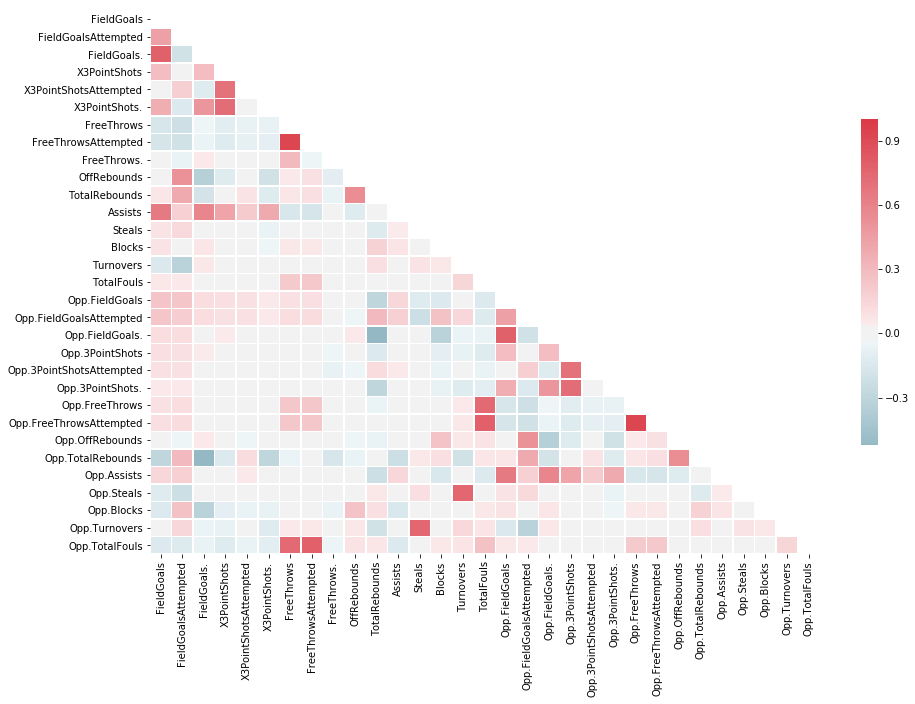

In [72]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .6});

In [73]:
fig.savefig('heatmap.jpeg')

### Keras 

In [74]:
x_data = data

In [75]:
from sklearn import model_selection

train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)

print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(1344, 31)
(576, 31)
(1344, 1)
(576, 1)


In [76]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')

enc.fit(train_label)
train_label = enc.transform(train_label).toarray()

enc.fit(test_label)
test_label = enc.transform(test_label).toarray()

print(train_label.shape)
print(test_label.shape)

# from tensorflow.keras import utils
# train_label = utils.to_categorical(train_label) # 0 or 1 -> one-hot vector
# test_label = utils.to_categorical(test_label) # 0 or 1 -> one-hot vector

(1344, 2)
(576, 2)


In [77]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [78]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=31, units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Dense(units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))




model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1

In [79]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

In [80]:
history = model.fit(train_data, train_label, batch_size=100, epochs=20, validation_split=0.3) 

Train on 940 samples, validate on 404 samples
Epoch 1/20
940/940 [==============================] - 2s 2ms/sample - loss: 0.3612 - categorical_accuracy: 0.8223 - val_loss: 1.0944 - val_categorical_accuracy: 0.5594
Epoch 2/20
940/940 [==============================] - 0s 129us/sample - loss: 0.1539 - categorical_accuracy: 0.9426 - val_loss: 1.0825 - val_categorical_accuracy: 0.5990
Epoch 3/20
940/940 [==============================] - 0s 136us/sample - loss: 0.1248 - categorical_accuracy: 0.9521 - val_loss: 0.7268 - val_categorical_accuracy: 0.6634
Epoch 4/20
940/940 [==============================] - 0s 129us/sample - loss: 0.0949 - categorical_accuracy: 0.9553 - val_loss: 0.8123 - val_categorical_accuracy: 0.6535
Epoch 5/20
940/940 [==============================] - 0s 144us/sample - loss: 0.0780 - categorical_accuracy: 0.9702 - val_loss: 0.7952 - val_categorical_accuracy: 0.6733
Epoch 6/20
940/940 [==============================] - 0s 149us/sample - loss: 0.0571 - categorical_accurac

In [81]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

576/576 [==============================] - 0s 81us/sample - loss: 0.1027 - categorical_accuracy: 0.9514
loss (cross-entropy) : 0.1027488572936919
test accuracy : 0.9513889


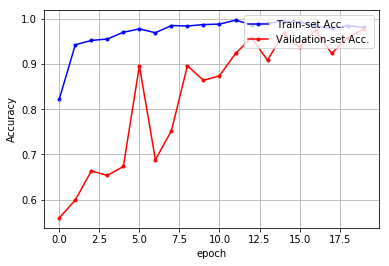

In [82]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [94]:
# a=df.loc[4995]

In [123]:
# a = np.array(a)

In [120]:
# model.predict(a4)

In [121]:
# # del a['new_dates']
# # del a['Unnamed: 0']
# # del a['Date']
# # del a['Game']
# # del a['TeamPoints']
# # del a['OpponentPoints']
# del a['WINorLOSS']

In [116]:
# a2 = a[target_col]/weight_col

In [122]:
# a2